#### **Student Name: *Harika Ravi***
#### **Student Number: 9032698**

##### Program: Applied Artificial Intelligence and Machine Learning

#### Section 1, Practical Lab 2

--------------------------------------------------

### **Part 1: Data Preparation and Exploration**

Objective: build a model that can best predict the risk of diabetes progression. This will be used as a screening tool to help physicians with identifying patients at risk. The models that we look into are:
1. Univariate polynomial regression models
2. Multivariate Polynomial models
3. Decision Trees
4. kNNs
In this lab we will evaluate the models using R-squared, Mean Absolute Percentage Error (MAPE) and Mean Absolute Error (MAE) metrics. To do that we will run a train-validation-test split.

#### Step 1: Get the Data

In [1]:
# Importing the libraris to work with the functions
from sklearn import datasets # to work with datasets
import pandas as pd  # to work with data analysis and manipulation

# Load the diabetes dataset from scikit-learn
diabetes_data = datasets.load_diabetes(as_frame=True) 

# To access the dataframe of the loaded dataset
df = diabetes_data.frame

#### Step 2: Framing the Problem

Define the problem clearly: In this case, the target of the classification is to estimate diabetic progression on the basis of the characteristics in the data set.

#### Step 3: EDA (Exploratory Data Analysis)

In [2]:
# To display the statistics of the numeric column in dataframe
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

Independent Variables :
 
age: Age in years

sex: Gender of the patient

bmi: Body mass index (BMI)

bp: Average blood pressure

s1 (tc): Total serum cholesterol

s2 (ldl): Low-density lipoproteins

s3 (hdl): High-density lipoproteins

s4 (tch): Total cholesterol / HDL ratio

s5 (ltg): Possibly log of serum triglycerides level

s6 (glu): Blood sugar level

* Scatter plots: Visualize the relationship between features and the target

In [3]:
# Importing the necessary libraries
import matplotlib.pyplot as plt # to work with the plots
import seaborn as sns  # to work with the visualization

# Scatter plots
plt.figure(figsize=(12, 6)) # here we are setting the size for the plot
sns.scatterplot(x='bmi', y='target', data=df)  # using BMI against target variable i.e., disease progression
plt.title('Scatter Plot of BMI vs Disease Progression')
plt.show()

* Histograms: Check the distribution of features

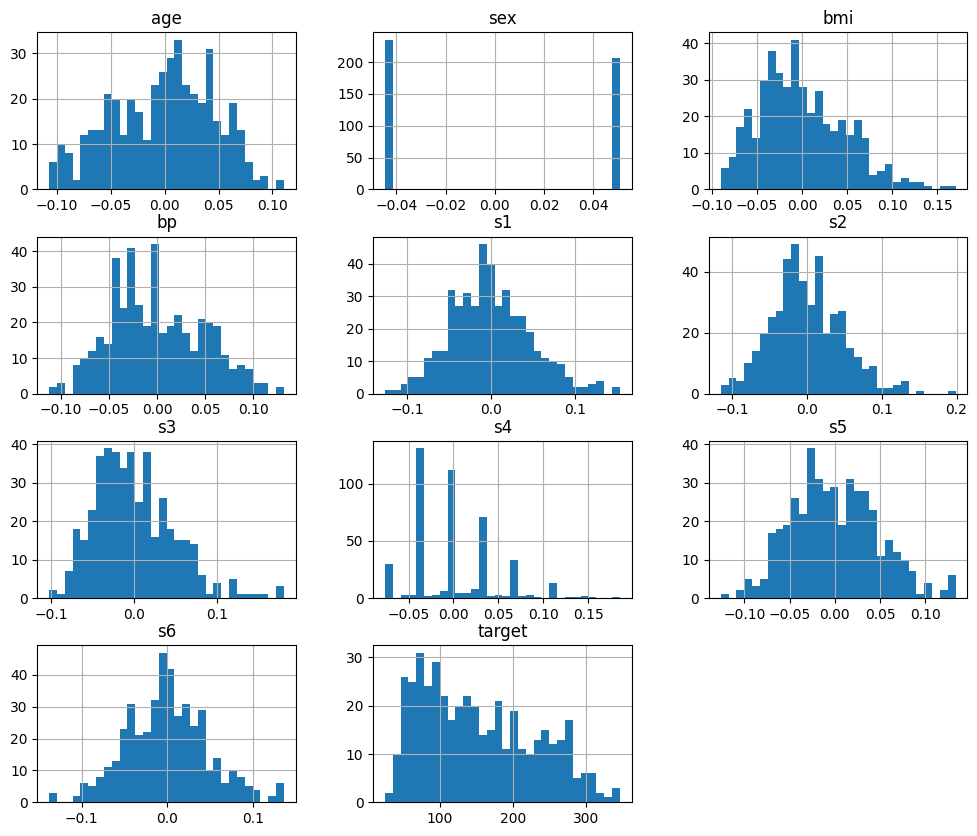

In [4]:
# Histograms
df.hist(figsize=(12, 10), bins=30) #displaying all the numeric columns of the dataframe
plt.show()

* Correlation matrix: Analyze feature relationships with a heatmap.

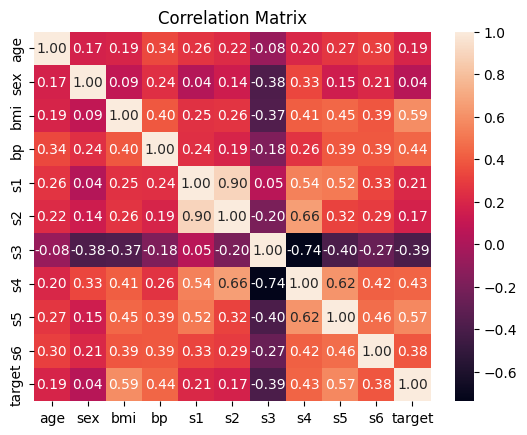

In [5]:
# Correlation matrix
correlation_matrix = df.corr() # used to identify the relation between numeric variables
sns.heatmap(correlation_matrix, annot=True, fmt=".2f") # we are displaying the correlation matrix with annotations
plt.title('Correlation Matrix')
plt.show()

* Insights:

1. BMI (Body Mass Index) has a clear positive relationship with diabetes progression, meaning higher BMI is linked to a greater risk of the disease getting worse.
2. Cholesterol and Triglycerides (Serum Measurements) are important factors in predicting diabetes progression, as higher values seem related to more severe disease.
3. Age and Sex don’t show a strong connection to disease progression, so they might not be very helpful for making predictions.

#### Step 4: Cleaning the Data

 * Feature Scaling:

The data is already adjusted (mean-centered and scaled), so you don’t need to scale it again for most models. However, for models like k-Nearest Neighbors (kNN), which are sensitive to the range of values, we might still consider normalizing the data (like using Min-Max scaling). But for now, the current scaling is good enough for most models.

With these above checks in mind, the data is clean and ready for model building without needing any major cleaning steps.

In [6]:
# Check for missing values and cleaning the values if necessary
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


#### Step 5: Splitting the data

To split the dataset into training, validation, and test sets (75%, 10%, and 15% respectively), we are using these steps the Scikit-Learn’s train_test_split method

In [7]:
# Importing the library
from sklearn.model_selection import train_test_split #for creating training and testing modules

X = df.drop(columns=['target']) #to colums for training model
y = df['target'] #to columns that model will learn to predict

#we are spilitting the data set into training and testing 
#here 75% od the data is used to train the model
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
#here we are 10% for the validation and 15% for the original data for test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 331 samples
Validation set: 44 samples
Test set: 67 samples


### **Part 2: Modeling the Datasets**

#### Step 6: A Univariate Polynomial Regression on BMI feature

In [8]:
# Importing the necessary library function to perform the regression
from sklearn.preprocessing import PolynomialFeatures  #to create multiple features
from sklearn.linear_model import LinearRegression #to create regression model

# Function to fit and evaluate models
def evaluate_polynomial_model(degree, X_train, y_train, X_val, y_val):
    poly = PolynomialFeatures(degree=degree) #initilizing the objects
    X_poly_train = poly.fit_transform(X_train[['bmi']]) #training the bmi feature to polynomial feature
    X_poly_val = poly.transform(X_val[['bmi']]) #validating the bmi feature to polynomial feature
    
    #creating the LinearRegression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train) #fitting teh features of training data modules
    
    train_score = model.score(X_poly_train, y_train)  #training data
    val_score = model.score(X_poly_val, y_val) #validating data
    
    return train_score, val_score, model

results = []
for degree in range(6):  #  looping from 0 to 5
    train_score, val_score, model = evaluate_polynomial_model(degree, X_train, y_train, X_val, y_val)
    results.append((degree, train_score, val_score))

# Create a DataFrame to summarize results
results_df = pd.DataFrame(results, columns=['Degree', 'Train R²', 'Val R²'])
print(results_df)


   Degree  Train R²    Val R²
0       0  0.000000 -0.106957
1       1  0.349672  0.331264
2       2  0.350764  0.331631
3       3  0.350774  0.331638
4       4  0.353014  0.340758
5       5  0.354100  0.349881


**Results**:

For each degree, the R-squared score will give an idea of how well the model fits. As the degree increases, the model becomes more flexible but may risk overfitting. You can choose the degree that provides a good balance between fit and simplicity.


#### Step 7: Comparing the models using the training and validation data

In [9]:
# Importing the necessary functions for evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

for degree in range(6): #looping through the polynomial degrees
    poly = PolynomialFeatures(degree=degree)  #initilizing
    X_poly_train = poly.fit_transform(X_train[['bmi']]) #fit and transform the trainig data 
    X_poly_val = poly.transform(X_val[['bmi']]) #validating the data 
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_val_pred = model.predict(X_poly_val) #predicting the values fro the data sets
    
    #calculating the MAE
    mae = mean_absolute_error(y_val, y_val_pred)
    #calculating the MAPE
    mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    #for displaying and updating the results
    results_df.loc[results_df['Degree'] == degree, 'MAE'] = mae
    results_df.loc[results_df['Degree'] == degree, 'MAPE'] = mape

print(results_df)

   Degree  Train R²    Val R²        MAE      MAPE
0       0  0.000000 -0.106957  66.057059  0.712639
1       1  0.349672  0.331264  47.208472  0.470600
2       2  0.350764  0.331631  47.213700  0.472397
3       3  0.350774  0.331638  47.185414  0.472227
4       4  0.353014  0.340758  46.090118  0.460503
5       5  0.354100  0.349881  45.462121  0.451753


**Results:**

The table will summarize the performance of each polynomial model on the training and validation datasets across the three metrics (R-squared, MAE, and MAPE). This will us to compare the models and determine which one performs best on both training and validation data.

#### Step 8: Identifying the Best model based on the table

In [10]:
#here we are finding the degree of model
# predicting the R(square) 
best_model_degree = results_df.loc[results_df['Val R²'].idxmax(), 'Degree']
print(f"Best Model Degree: {best_model_degree}")

Best Model Degree: 5


**Results**

The best model is Degree 5, as it has:
* The highest R-squared score on the validation set ( 0.349881)
* The lowest MAE (45.462121) and MAPE (0.451753) on the validation set, indicating more accurate predictions.

This model achieves the best balance between predictive power and accuracy.

#### Step 9: Testing the chosen model and displaying the result

In [11]:
# Fit the best model on the training set and evaluate on the test set
#model fitting and transformation
best_poly = PolynomialFeatures(degree=best_model_degree)
X_poly_train_best = best_poly.fit_transform(X_train[['bmi']]) 
X_poly_test = best_poly.transform(X_test[['bmi']])

best_model = LinearRegression()
best_model.fit(X_poly_train_best, y_train) #thhis step trains the model 

y_test_pred = best_model.predict(X_poly_test) #helps to predict the test set

test_r_squared = best_model.score(X_poly_test, y_test) #this provides a measure the test data
test_mae = mean_absolute_error(y_test, y_test_pred) #to find the absolute error value
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) #to find the percentage of absolute error value

print(f"Test R²: {test_r_squared}, \nTest MAE: {test_mae}, \nTest MAPE: {test_mape}")

Test R²: 0.26669658449530775, 
Test MAE: 51.75025709277397, 
Test MAPE: 0.4302671323305443


#### Step 10: Ploting the Graphs

In [12]:
#Importing the functions from thr library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# setting the degree for the polynomial and adjust the model
degree = 2  

# Initialize the PolynomialFeatures object
poly = PolynomialFeatures(degree=degree)

# Fit and training teh data sets
X_poly_train = poly.fit_transform(X_train[['bmi']])  # Transform training features
model = LinearRegression()  # Initialize the linear regression model
model.fit(X_poly_train, y_train)  # Fit the model to the training data

# Transform validation data
X_poly_val = poly.transform(X_val[['bmi']])  # ensures the training without fitting again

# Now transform the test set 'bmi' into polynomial features
X_poly_test = poly.transform(X_test[['bmi']])  # Transform the test data
y_test_pred = model.predict(X_poly_test)  # Generate predictions for the test data

# Now plotting the data
plt.scatter(X_train['bmi'], y_train, color='brown', label='Train')  # Training data set
plt.scatter(X_val['bmi'], y_val, color='blue', label='Validation')  # Validation data set
plt.scatter(X_test['bmi'], y_test, color='yellowgreen', label='Test')  # Test data sets
plt.plot(X_test['bmi'], y_test_pred, color='black', label='Predictions Degree 5')  # Predicted values on test data
plt.legend()  # Display legend
plt.title('Train, Validation, and Test Data with Predictions')  # Title of the plot
plt.xlabel('BMI')  # X-axis label
plt.ylabel('Diabetes Progression')  # Y-axis label
plt.show()  # Display the plot

**Results**

* A plot showing the distribution of training, validation, and test data points.
* A black curve representing the Degree 5 polynomial fit, allowing you to visually assess how well the model fits each set.

#### Step 11: Equation for the Best Model

In [13]:
#extracting the coefficients and intercept
coefficients = best_model.coef_ 
intercept = best_model.intercept_ 

# Format the equation nicely to two decimal place 
equation = f"y = {intercept:.2f} + "
for i, coef in enumerate(coefficients[1:], start=1): #looping from the index 1
    equation += f"{coef:.2f} * x^{i} + "
equation = equation[:-3]  # Remove the last '+' and spaces to form the equation in a string
print(f"Model Equation: \n{equation}")


Model Equation: 
y = 153.65 + 1059.89 * x^1 + -3824.15 * x^2 + -16770.23 * x^3 + 753722.52 * x^4 + -2993716.57 * x^5


#### Step 12: Expected Diabetes Progression for BMI

In [14]:
# Defining the bmi value to predict the disease progression
bmi_value = 60
#using the best model to predict the disease progression and transforming the bmi value for making the prediction
expected_progression = best_model.predict(best_poly.transform([[bmi_value]]))
print(f"Expected Disease Progression for BMI {bmi_value}: {expected_progression[0]:.2f}")

Expected Disease Progression for BMI 60: -2318149399660962.50


c:\Users\harik\Downloads\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


#### Step 13: Parameters to Train

In [15]:
#counting the number of trainable parameters
n_parameters = best_poly.get_feature_names_out().size
# #printing the number of models tht corresponded to the parameters created
print(f"Number of trainable parameters: {n_parameters}")

Number of trainable parameters: 6


#### Step 14: Conclusion

Thus, referring specifically to the models developed in this assignment, one must acknowledge the various parameters that actually limit the overall potential of models in predicting the progression of diabetes based on BMI. Additional features and complexity of the models may certainly provide higher predictive accuracy and better applicability in practical settings.

### **Part 3: Multivariate Modeling**

#### Step 15: Droping some features per the discretion based on the EDA.

In [16]:
# For polynomial regression with multiple features, create a polynomial transformation with all features.
poly_features = PolynomialFeatures(degree=2)   #initiating the degree to 2
X_poly_all = poly_features.fit_transform(X) #transforming the input to polynomial 

# For decision trees, using the DecisionTreeRegressor function.
from sklearn.tree import DecisionTreeRegressor

# for a decision tree
tree_model = DecisionTreeRegressor(max_depth=3) #intilizing the depth to 3
tree_model.fit(X_train, y_train) #fitting the model to training data

# For kNNs 
from sklearn.neighbors import KNeighborsRegressor
# Initializong the kNN neighbour with 5 
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train) #fitting the model to training data

KNeighborsRegressor()